# Старостенок Дмитрий КЭ-403 - Поиск частых наборов

Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%).

Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
 - сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
 - количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.

Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
 - формулировка задания;
 - гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
 - рисунки с результатами визуализации; 
 - пояснения, раскрывающие смысл полученных результатов.

In [282]:
import pandas as pd
import chardet
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import time
import matplotlib.pyplot as plt

In [283]:
with open('baskets.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('baskets.csv', encoding=result['encoding'])
df

,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
0,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,низкокалорийный йогурт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
def find_frequent_itemsets(data, min_support, sort_by='support'):
    # Преобразование данных в список списков для подачи в метод fit
    transactions = data.values.tolist()

    # Удаление значений NaN из транзакций
    transactions = [[item for item in transaction if not pd.isnull(item)] for transaction in transactions]

    # Преобразование в разряженную матрицу
    te = TransactionEncoder()
    te_transform = te.fit(transactions).transform(transactions)
    transactions_matrix = pd.DataFrame(te_transform, columns=te.columns_)

    # Поиск частых наборов с помощью алгоритма Apriori
    frequent_itemsets = apriori(transactions_matrix, min_support=min_support, use_colnames=True)

    # Сортировка результатов
    if sort_by == 'support':
        frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    elif sort_by == 'lexical':
        frequent_itemsets = frequent_itemsets.sort_values(by='itemsets')

    return frequent_itemsets

In [285]:
min_support = 0.01
result = find_frequent_itemsets(df, min_support, sort_by='support')
result

,support,itemsets
31,0.238267,(минеральная вода)
26,0.188000,(макароны)
73,0.179733,(яйца)
20,0.170933,(картофель-фри)
69,0.163867,(шоколад)
...,...,...
237,0.010133,"(шоколад, суп)"
121,0.010133,"(замороженные овощи, низкокалорийный йогурт)"
250,0.010133,"(говяжий фарш, яйца, минеральная вода)"
154,0.010000,"(креветки, картофель-фри)"


In [286]:
result_with_2_items = result[result['itemsets'].apply(lambda x: len(x)) == 2]
result_with_2_items

,support,itemsets
185,0.061200,"(макароны, минеральная вода)"
213,0.052667,"(шоколад, минеральная вода)"
215,0.050933,"(яйца, минеральная вода)"
201,0.048000,"(молоко, минеральная вода)"
105,0.040933,"(говяжий фарш, минеральная вода)"
...,...,...
212,0.010267,"(хлопья, минеральная вода)"
237,0.010133,"(шоколад, суп)"
121,0.010133,"(замороженные овощи, низкокалорийный йогурт)"
154,0.010000,"(креветки, картофель-фри)"


In [287]:
result_with_3_items = result[result['itemsets'].apply(lambda x: len(x)) == 3]
result_with_3_items

,support,itemsets
247,0.017200,"(макароны, говяжий фарш, минеральная вода)"
256,0.016400,"(макароны, шоколад, минеральная вода)"
254,0.016133,"(макароны, молоко, минеральная вода)"
257,0.015200,"(макароны, яйца, минеральная вода)"
260,0.014000,"(молоко, шоколад, минеральная вода)"
262,0.013467,"(яйца, шоколад, минеральная вода)"
261,0.013067,"(яйца, молоко, минеральная вода)"
251,0.012267,"(макароны, замороженные овощи, минеральная вода)"
246,0.011733,"(блинчики, макароны, минеральная вода)"
258,0.011200,"(макароны, молоко, шоколад)"


In [288]:
# Измерение времени выполнения
def measure_execution_time(data, min_support):
    start_time = time.time()
    find_frequent_itemsets(data, min_support)
    end_time = time.time()
    return end_time - start_time

# Диаграмма сравнения времени выполнения
def plot_execution_time(data, min_support_values):
    execution_times = [measure_execution_time(data, min_support) for min_support in min_support_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(min_support_values, execution_times, marker='o', linestyle='-')
    plt.title('Сравнение времени выполнения при изменении порога поддержки')
    plt.xlabel('Порог поддержки')
    plt.ylabel('Время выполнения (секунды)')
    plt.grid(True)
    plt.show()

# Диаграмма количества частых наборов объектов различной длины
def plot_frequent_itemset_length(data, min_support_values):
    number_of_items_by_length = {i: [] for i in range(1, len(min_support_values) - 1)}
    supports = []
    
    for min_support in min_support_values:
        frequent_itemsets = find_frequent_itemsets(data, min_support)
        
        # Подсчет количества наборов разной длины
        counts = frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts().sort_index()
    
        # Сохраняем результаты
        for length in number_of_items_by_length.keys():
            number_of_items_by_length[length].append(counts.get(length, 0))
        supports.append(min_support)   
        
    # Создаем диаграмму
    plt.figure(figsize=(10, 6))

    # Для каждой длины набора
    for length, counts in number_of_items_by_length.items():
        plt.plot(supports, counts, label=f'Кол-во элементов в наборе: {length}')

    plt.xlabel('Поддержка')
    plt.ylabel('Число наборов')
    plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
    plt.legend()
    plt.grid(True)
    plt.show()

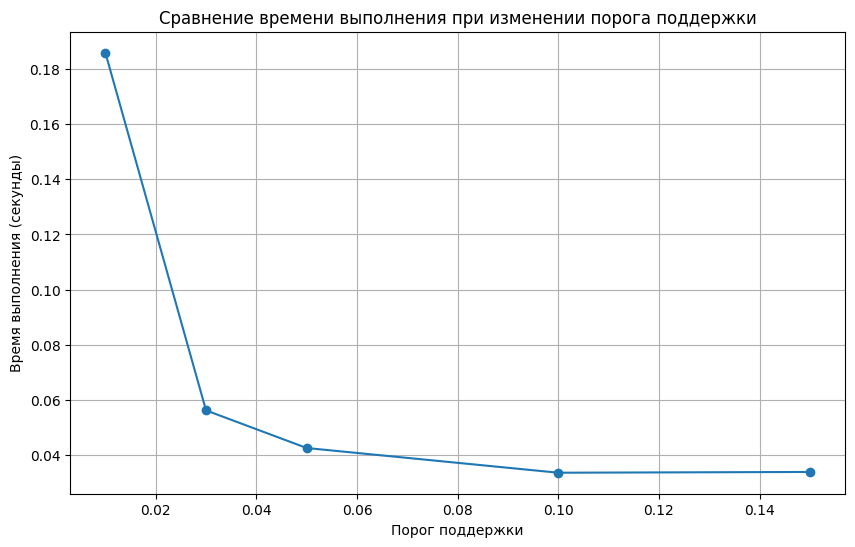

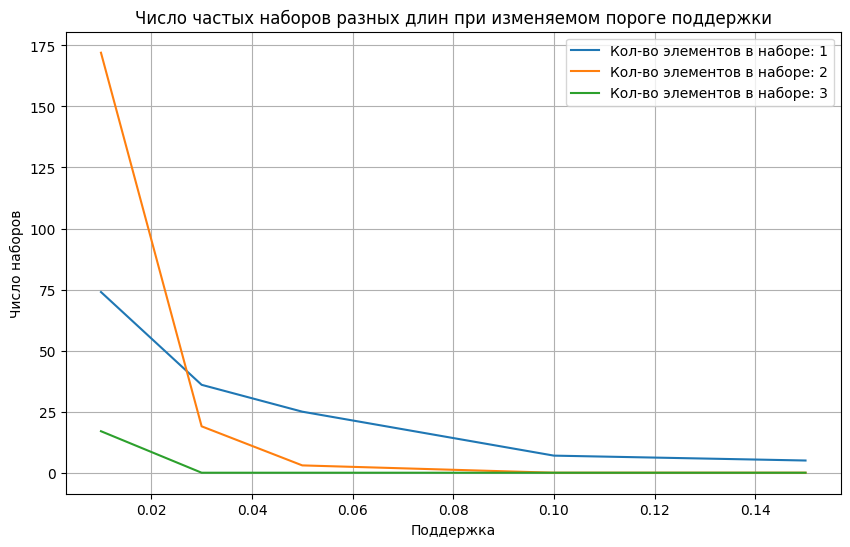

In [289]:
min_support_values = [0.01, 0.03, 0.05, 0.10, 0.15]

# Создадим диаграммы
plot_execution_time(df, min_support_values)
plot_frequent_itemset_length(df, min_support_values)